In [168]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from sklearn.linear_model import SGDRegressor

In [169]:
X, y, coef = make_regression(n_samples=100,
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)
print(coef)

42.38550485581797


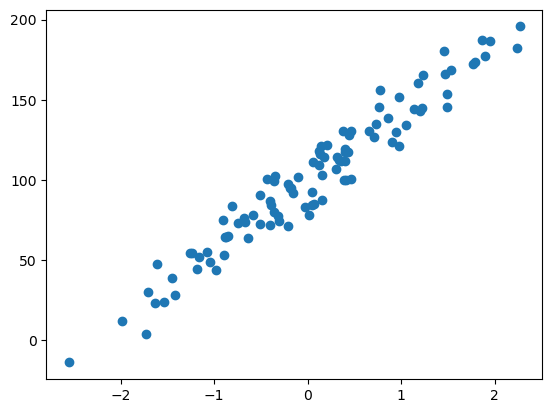

In [170]:
plt.scatter(X, y)

In [171]:
def compute_mse(coefs, X, y):
    X = X.reshape(1, -1)[0]
    y_preds = coefs[0]*X + coefs[1]
    mse = (1/y.shape[0]) * ((y_preds-y)**2).sum()
    return mse

In [172]:
a = 1
b = 2
coefs = [a, b]
print(compute_mse(coefs, X, y))

11808.867339751563


In [173]:
aa, bb = np.mgrid[-200:200:0.5, -200:200:0.5]
grid = np.c_[aa.ravel(), bb.ravel()]
grid

array([[-200. , -200. ],
       [-200. , -199.5],
       [-200. , -199. ],
       ...,
       [ 199.5,  198.5],
       [ 199.5,  199. ],
       [ 199.5,  199.5]], shape=(640000, 2))

In [174]:
np.array([compute_mse([a, b], X, y) for a, b in grid])

array([158315.41493175, 158001.96852692, 157689.02212209, ...,
        36930.21718467,  37039.16408205,  37148.61097942], shape=(640000,))

In [175]:
mse_with_data = partial(compute_mse, X=X, y=y)
np.array([mse_with_data([a, b]) for a, b in grid])

array([158315.41493175, 158001.96852692, 157689.02212209, ...,
        36930.21718467,  37039.16408205,  37148.61097942], shape=(640000,))

In [176]:
from multiprocessing import Pool

with Pool() as pool:
    losses = np.array(pool.map(mse_with_data, grid))
print(losses[:10])
grid[np.argmin(losses)]

[158315.41493175 158001.96852692 157689.02212209 157376.57571726
 157064.62931244 156753.18290761 156442.23650278 156131.79009795
 155821.84369312 155512.39728829]


array([42.5, 99. ])

[None,
 (-200.0, 200.0),
 (-200.0, 200.0),
 Text(0.5, 0, '$a$'),
 Text(0, 0.5, '$b$')]

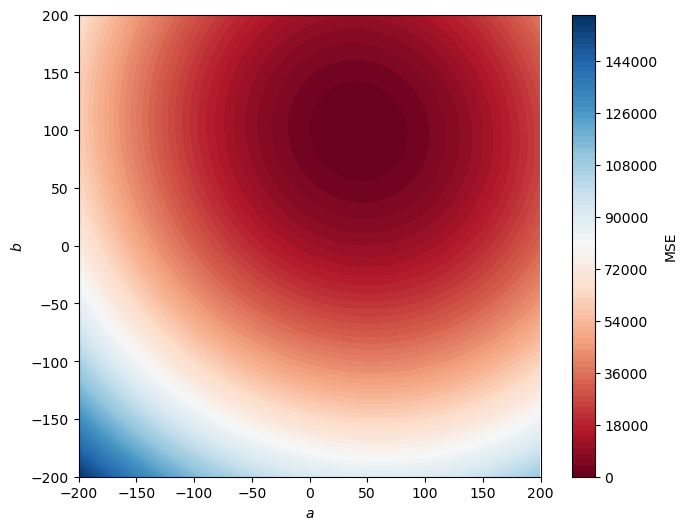

In [177]:
aa, bb = np.mgrid[-200:200:.5, -200:200:.5]
grid = np.c_[aa.ravel(), bb.ravel()]
losses_reshaped = np.array(losses).reshape(aa.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(aa,
                    bb,
                    losses_reshaped,
                    100,
                    cmap="RdBu",
                    vmin=0,
                    vmax=160000)
ax_c = f.colorbar(contour)
ax_c.set_label("MSE")

ax.set(aspect="equal",
    xlim=(-200, 200),
    ylim=(-200, 200),
    xlabel="$a$",
    ylabel="$b$")

#best_ten_coefs = grid[np.argsort(losses)[:10], :]
#plt.scatter(best_ten_coefs[:, 0], best_ten_coefs[:, 1], c="blue")

In [178]:
grid[np.argmin(losses)]

array([42.5, 99. ])

In [179]:
learning_rate = 0.1
nbr_iterations= 100
array_a = [a]
array_b = [b]
for i in range(nbr_iterations):
    X = X.reshape(1, -1)[0]
    y_preds = a*X + b
    pd_a = (1/len(y)) * sum((y_preds - y) * X)
    pd_b = (1/len(y)) * sum(y_preds - y)
    a = a - learning_rate * pd_a
    b = b - learning_rate * pd_b

    array_a.append(a)
    array_b.append(b)

In [180]:
a

np.float64(42.619979048289395)

In [181]:
b

np.float64(99.18340156858065)

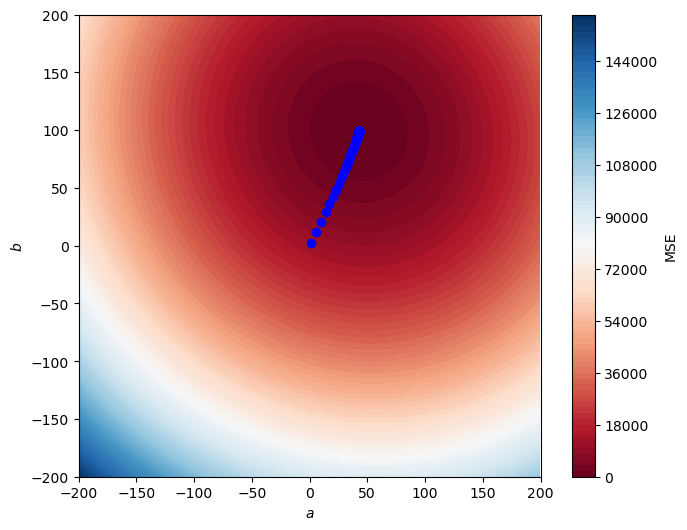

In [182]:
aa, bb = np.mgrid[-200:200:.5, -200:200:.5]
grid = np.c_[aa.ravel(), bb.ravel()]
losses_reshaped = np.array(losses).reshape(aa.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(aa,
                    bb,
                    losses_reshaped,
                    100,
                    cmap="RdBu",
                    vmin=0,
                    vmax=160000)
ax_c = f.colorbar(contour)
ax_c.set_label("MSE")

ax.set(aspect="equal",
    xlim=(-200, 200),
    ylim=(-200, 200),
    xlabel="$a$",
    ylabel="$b$")

plt.scatter(array_a, array_b, c="blue")

In [183]:
X1, y1, coef = make_regression(n_samples=100,
                         n_features=1,
                         n_informative=1,
                         noise=10,
                         coef=True,
                         random_state=0,
                         bias=100.0)

model = SGDRegressor(max_iter=100, l1_ratio=0.1)
model.fit(X1, y1)
print(model.coef_)
print(model.intercept_)

[42.62292357]
[99.15553906]
